In [55]:
from dtw import dtw
import numpy
def file_to_object(filename):
    file = open(filename, 'r')
    start = []
    stop = []
    labels = []
    content = file.readlines()
    for x in range(len(content)):
        split(content, labels, start, stop, x)
    return start, stop, labels

def split(content, labels, start, stop, x):
    line = content[x]
    a, b, c = line.split('\t')
    start.append(float(a))
    stop.append(float(b))
    labels.append(c)

In [56]:
import librosa
import matplotlib.pyplot as plt

def calculate_mfcc(filename, labels, start, stop):
    mfcc_train = {}

    for i in range(len(labels)):
        y, sr = librosa.load(filename, offset=start[i], duration =  (stop[i] - start[i]))
        mfcc = librosa.feature.mfcc(y, sr, n_mfcc=9)
        mfcc_train[i] = mfcc.T
    return mfcc_train

def mfcc_feature(filename, i, mfcc_train, start, stop):
    y, sr = librosa.load(filename, offset=start[i], duration=(stop[i] - start[i]))
    mfcc = librosa.feature.mfcc(y, sr, n_mfcc=9)
    mfcc_train[i] = mfcc.T


start2, stop2, labels2 = file_to_object('test_1.txt')
start, stop, labels = file_to_object('test_2.txt')
mfcc_1 = calculate_mfcc('test_2.wav', labels, start, stop)
mfcc_2 = calculate_mfcc('test_2.wav', labels2, start2, stop2)


In [57]:
dist, cost, acc_cost, path = dtw(mfcc_1[1], mfcc_2[1], dist=lambda x, y: numpy.linalg.norm(x - y, ord=1))
print('Distance between two same words:', dist)
dist, cost, acc_cost, path = dtw(mfcc_1[1], mfcc_2[3], dist=lambda x, y: numpy.linalg.norm(x - y, ord=1))
print('Distance between two different words:', dist)

Distance between two same words: 64.53050020644982
Distance between two different words: 231.03057112655398


In [58]:
distance = numpy.ndarray(shape = (len(mfcc_1), len(mfcc_1)))

for i in range(len(mfcc_1)):
    for j in range(len(mfcc_2)):
        dist, _, _, _ = dtw(mfcc_1[i], mfcc_2[j], dist=lambda x, y: numpy.linalg.norm(x - y, ord=1))
        distance[i][j] = dist

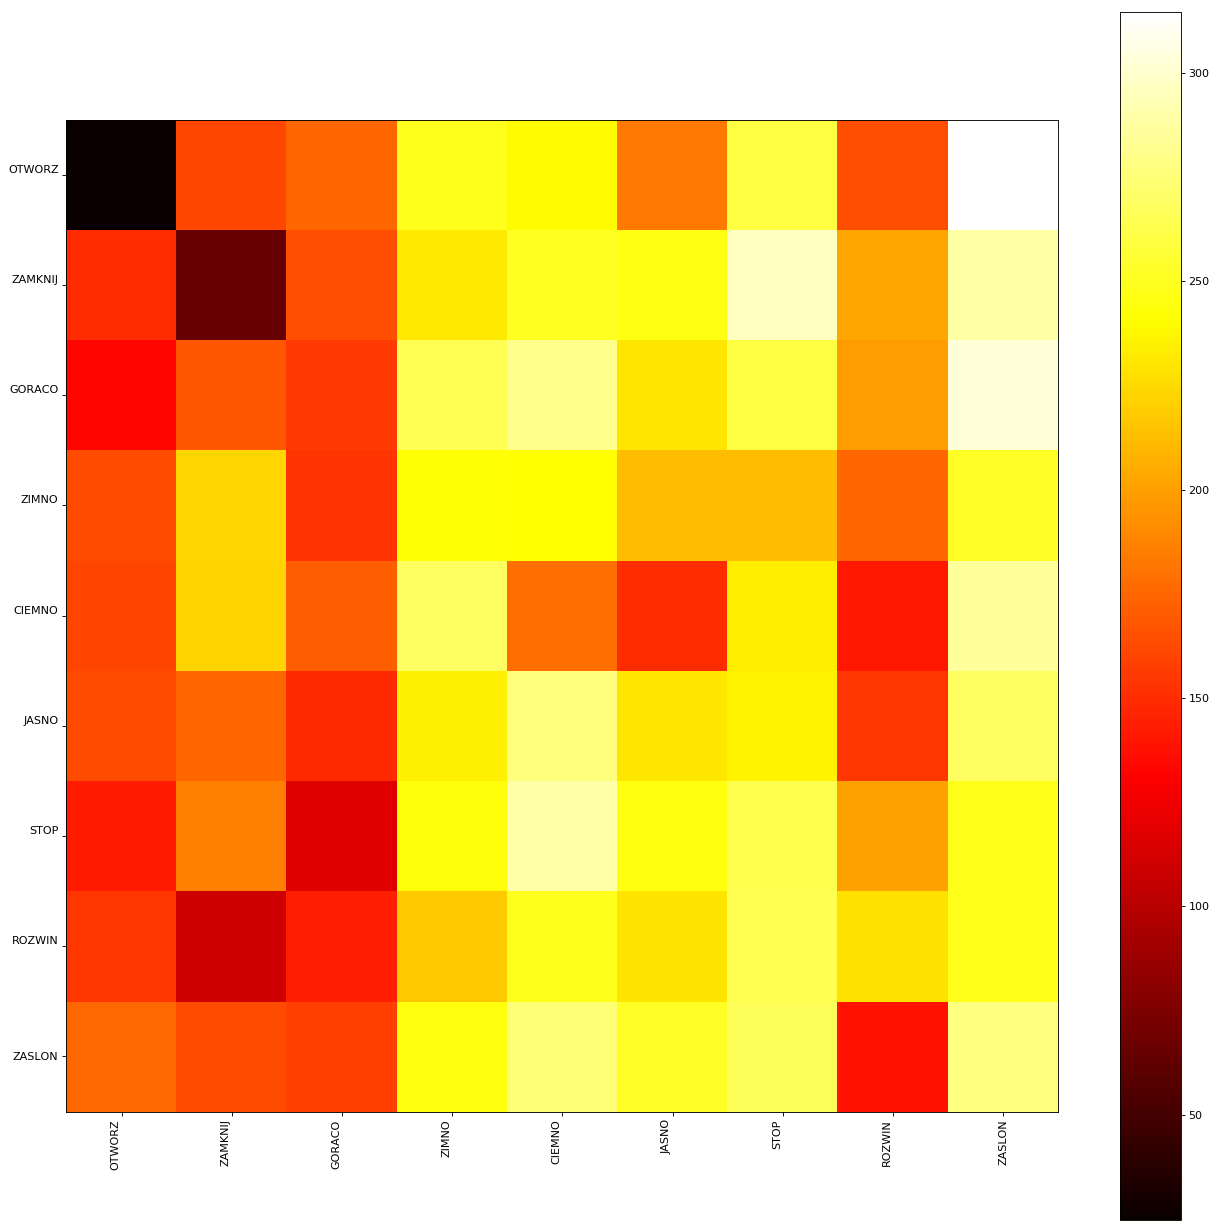

In [59]:
plt.figure(figsize=(20,20), dpi= 80, facecolor='w', edgecolor='k')
plt.imshow(result_dist, cmap='hot')
plt.colorbar()
plt.tick_params(axis = 'on', bottom='off', top='on', labelbottom='off', labeltop='on')
plt.xticks(range(len(result_dist)), labels, rotation=90)
plt.yticks(range(len(result_dist)), labels)
plt.show()

In [60]:
#Make a train set from mffc 1,2 and 3
start3, stop3, labels3 = read_labels('test_2.txt')
mfcc_3 = calculate_mfcc('test_2.wav', labels3, start3, stop3)

#Make a test set 
start_test, stop_test, labels_test = read_labels('test_3.txt')
mfcc_test = calculate_mfcc('test_3.wav', labels_test, start_test, stop_test)

In [61]:
#find the best word for undefined
test = 6
index = 0
min_distance = 1000
correct_classify = 0

for i in range (len(mfcc_test)):
    dist, _,_,_ = dtw(mfcc_test[test], mfcc_1[i], dist=lambda x, y: numpy.linalg.norm(x - y, ord=1))
    if min_distance > dist:
        min_distance = dist
        index = i

print("index " + str(index) + " is for word " + labels[index] + "correct is " + labels_test[test])

index 6 is for word STOP
correct is STOP



In [62]:
min_distance = 1000
correct_classify = 0
for j in range (len(mfcc_2)):
    min_distance = 1000
    for i in range (len(mfcc_1)):
        dist, _,_,_ = dtw(mfcc_2[j], mfcc_1[i], dist=lambda x, y: numpy.linalg.norm(x - y, ord=1))
        if min_distance > dist:
            min_distance = dist
            index = i
    if labels[index] == labels2[j]:    
        correct_classify += 1

print("Correct classify - " + str(correct_classify/len(labels2) *100) + "%")

Correct classify - 33.33333333333333%
